# Multilevel Models

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import pymc3 as pm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
from scipy.special import expit as logistic
import theano
import arviz as az

import warnings
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')
warnings.simplefilter(action="ignore", category=FutureWarning)

### Example: Multilevel tadpoles

##### Code 12.1

In [2]:
d = pd.read_csv("../data/reedfrogs.csv", sep=";")
d.head()

,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9


##### Code 12.2

In [33]:
d["tank"] = d.index

with pm.Model() as m12_1:
    a_tank = pm.Normal('a_tank', mu=0, sd=5, shape=d.shape[0])
    p = pm.Deterministic('p', pm.math.invlogit(a_tank[d.tank]))
    surv = pm.Binomial('surv', n=d.density, p=p, observed=d.surv)
    trace_m12_1 = pm.sample(1000, tune=1000)

az.summary(trace_m12_1, credible_interval=.89, round_to=2, var_names=["~p"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a_tank]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1042.82draws/s]


,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a_tank[0],2.55,1.21,0.75,4.33,0.04,0.04,836.13,567.80,1205.67,541.69,1.00
a_tank[1],5.65,2.68,1.51,9.43,0.07,0.06,1290.75,1042.88,1757.37,989.40,1.00
a_tank[2],0.91,0.75,-0.19,2.14,0.02,0.02,1669.20,1121.13,1698.54,984.09,1.00
a_tank[3],5.78,2.73,1.57,9.54,0.09,0.06,976.51,891.50,1156.22,1130.45,1.00
a_tank[4],2.52,1.22,0.66,4.31,0.04,0.03,1042.60,764.60,1323.56,804.49,1.00
a_tank[5],2.52,1.18,0.65,4.27,0.03,0.02,1825.06,1359.25,2175.79,1117.52,1.00
a_tank[6],5.64,2.64,1.81,9.64,0.08,0.06,1019.76,884.42,1282.56,1050.05,1.00
a_tank[7],2.48,1.12,0.75,4.19,0.03,0.03,1347.42,968.34,1720.79,880.36,1.00
a_tank[8],-0.45,0.67,-1.55,0.59,0.02,0.02,1855.76,782.74,1897.85,1259.12,1.00
a_tank[9],2.51,1.13,0.63,4.12,0.03,0.02,1796.96,1264.87,2135.97,1086.33,1.00


##### Code 12.3

In [34]:
with pm.Model() as m12_2:
    a = pm.Normal("a", mu=0, sd=1)
    sigma = pm.HalfCauchy('sigma', beta=1)
    a_tank = pm.Normal('a_tank', mu=a, sd=sigma, shape=d.shape[0])
    p = pm.Deterministic('p', pm.math.invlogit(a_tank[d.tank]))
    surv = pm.Binomial('surv', n=d.density, p=p, observed=d.surv)
    trace_m12_2 = pm.sample(1000, tune=1000)

az.summary(trace_m12_2, credible_interval=.89, round_to=2, var_names=["~p"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a_tank, sigma, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:04<00:00, 986.79draws/s] 


,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,1.29,0.24,0.92,1.69,0.00,0.00,2785.49,2681.01,2804.78,1763.78,1.0
a_tank[0],2.12,0.85,0.80,3.46,0.02,0.01,3077.70,2005.35,3368.64,1275.38,1.0
a_tank[1],3.00,1.06,1.26,4.59,0.02,0.02,2427.85,1913.86,2741.61,1479.17,1.0
a_tank[2],1.00,0.65,-0.07,1.92,0.01,0.01,3308.88,1782.21,3571.43,1374.15,1.0
a_tank[3],3.05,1.07,1.29,4.67,0.02,0.02,2005.53,1513.77,2252.42,1349.06,1.0
a_tank[4],2.12,0.86,0.62,3.34,0.02,0.01,2473.53,1660.41,2743.03,1073.04,1.0
a_tank[5],2.13,0.87,0.75,3.40,0.02,0.01,2705.65,1768.79,3169.13,1367.33,1.0
a_tank[6],3.01,1.08,1.29,4.66,0.02,0.02,3012.64,2286.67,3369.89,1507.97,1.0
a_tank[7],2.13,0.87,0.78,3.45,0.02,0.01,2782.93,1933.13,3211.25,1386.17,1.0
a_tank[8],-0.17,0.62,-1.22,0.75,0.01,0.02,4058.01,821.02,4057.25,1324.75,1.0


##### Code 12.4

In [35]:
compare_df = az.compare({f"m12_{i}": eval(f"trace_m12_{i}") for i in [1,2]})
compare_df

/Users/hamzaiqb/.pyenv/versions/miniconda3-4.3.30/envs/statrethinking/lib/python3.7/site-packages/arviz/stats/stats.py:1196: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m12_1,0,201.323,22.4608,0,0.505922,9.49015,0,True,deviance
m12_2,1,201.638,21.5377,0.315092,0.494078,7.15059,4.63567,True,deviance


##### Code 12.5 & Figure 12.1

In [36]:
post = pm.trace_to_dataframe(trace_m12_2, varnames=["a_tank"])

d["probsurv_est"] = pd.Series(logistic(post.median(axis=0).values), index=d.index)

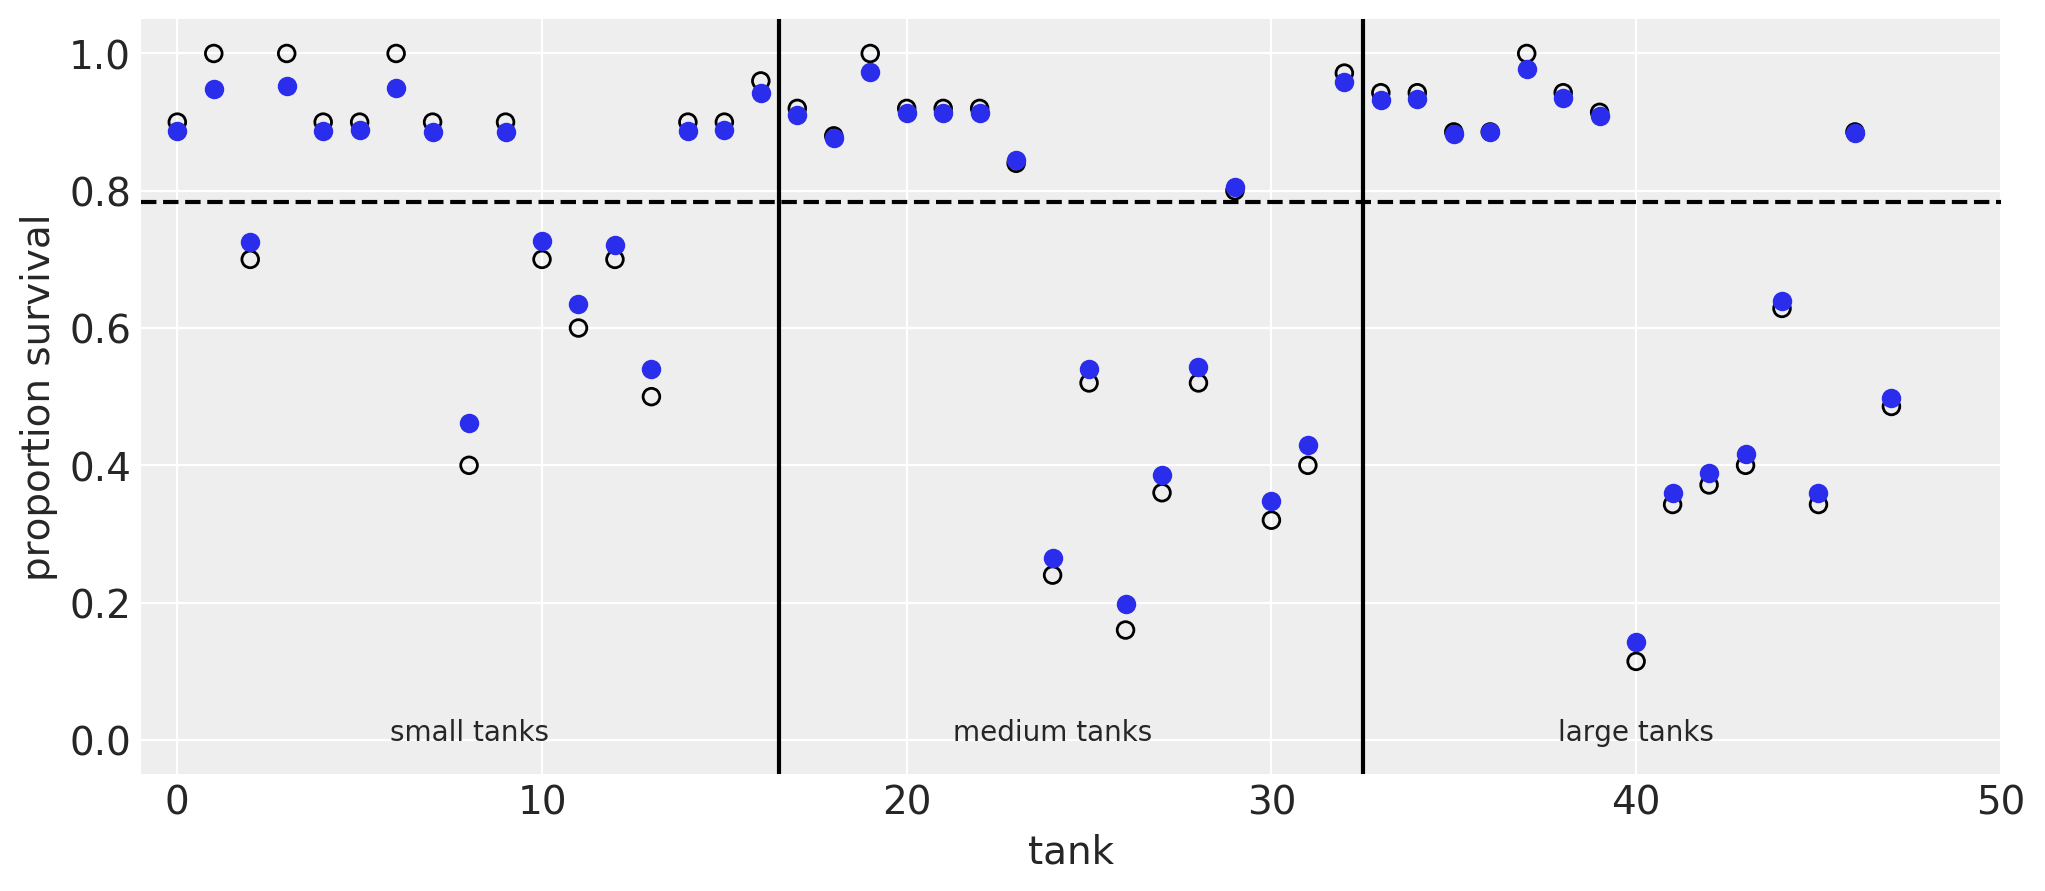

In [51]:
_, ax = plt.subplots(1,1, figsize=(12,5))

# plot empirical observations
ax.scatter(d.tank, d.propsurv, facecolors='none', edgecolors='k', lw=1)

# plot estimated probability
ax.scatter(d.tank, d.probsurv_est)

# plot global avg
ax.axhline(logistic(np.median(trace_m12_2["a"], axis=0)), 0, 1, linestyle="--", color="k")

# split chart into small, medium and large tank areas
ax.axvline(16.5, color="k")
ax.axvline(32.5, color="k")

ax.text(8, 0, "small tanks", horizontalalignment='center')
ax.text(16+8, 0, "medium tanks", horizontalalignment='center')
ax.text(32+8, 0, "large tanks", horizontalalignment='center')

ax.set(xlim=(-1,50), ylim=(-0.05, 1.05))
ax.set_xlabel('tank', fontsize=14)
ax.set_ylabel('proportion survival', fontsize=14);

##### Code 12.6 & Figure 12.2

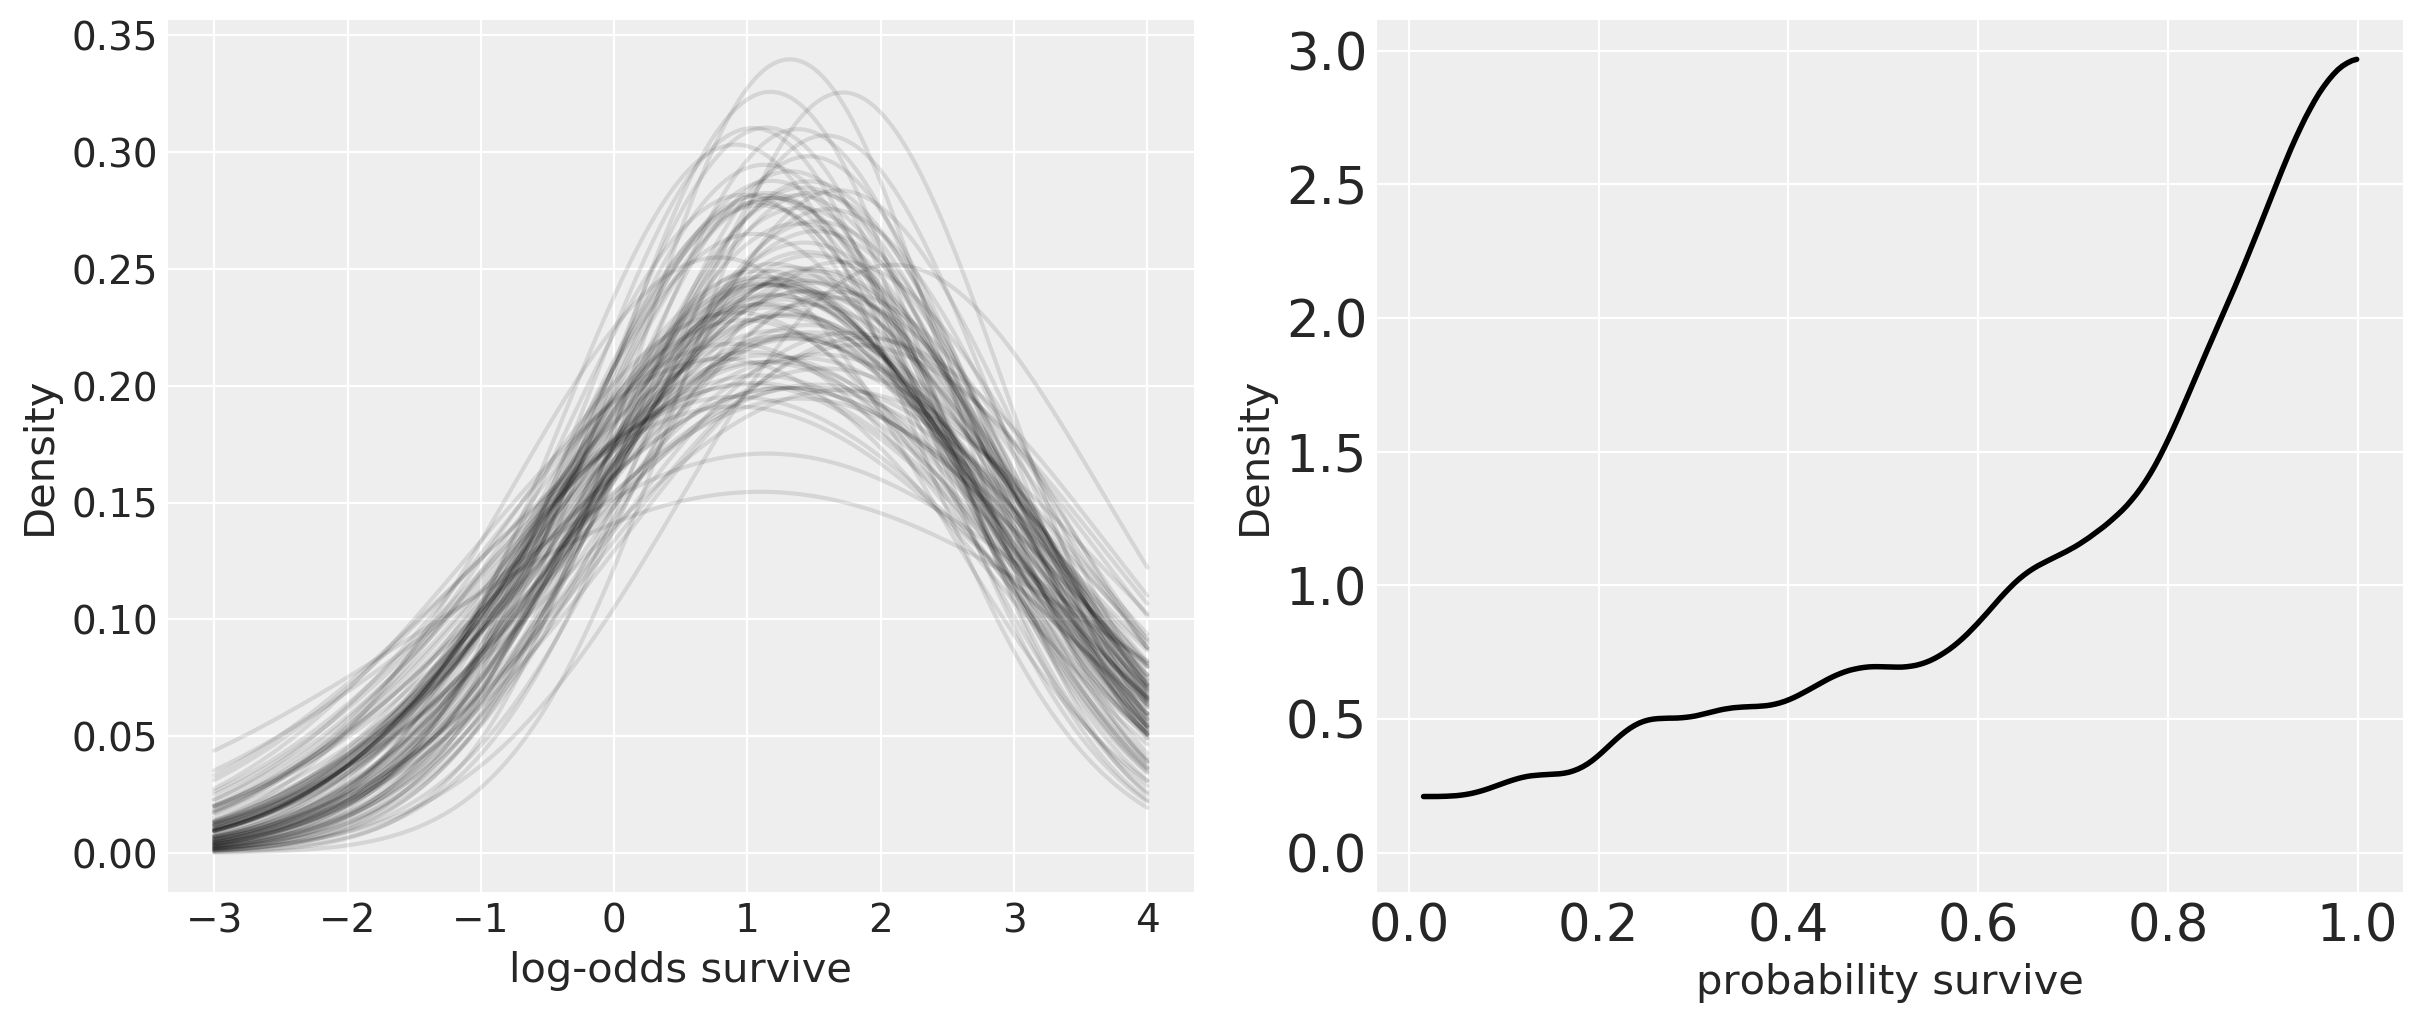

In [65]:
_, ax = plt.subplots(1,2, figsize=(12,5), constrained_layout=True)

# show first 100 populations in the posterior
xrange = np.linspace(-3, 4, 200)
postcurve = [sp.stats.norm.pdf(xrange, loc=trace_m12_2["a"][i], scale=trace_m12_2["sigma"][i]) for i in range(100)]
ax[0].plot(xrange, np.asarray(postcurve).T, alpha=.1, color='k')
ax[0].set_ylabel("Density")
ax[0].set_xlabel("log-odds survive")

sim_tanks = np.random.normal(loc=trace_m12_2["a"], scale=trace_m12_2["sigma"])

az.plot_kde(logistic(sim_tanks), ax=ax[1], plot_kwargs={'color':'k'})
ax[1].set_ylabel("Density")
ax[1].set_xlabel("probability survive");

### Varying effects and the underfitting/overfitting trade-off

##### Code 12.7

In [67]:
a = 1.4
sigma = 1.5
nponds = 60
ni = np.repeat([5, 10, 25, 35], 15)

##### Code 12.8

In [68]:
a_pond = np.random.normal(loc=a, scale=sigma, size=nponds)

##### Code 12.9

In [69]:
dsim = pd.DataFrame(dict(pond=np.arange(nponds), ni=ni, true_a=a_pond))

##### Code 12.10

In [72]:
print(type(1))
print(type(1.))

<class 'int'>
<class 'float'>


##### Code 12.11

In [74]:
dsim["si"] = np.random.binomial(n=dsim.ni, p=logistic(dsim.true_a))

##### Code 12.12

In [76]:
dsim["p_nopool"] = dsim.si / dsim.ni

##### Code 12.13

In [78]:
with pm.Model() as m12_3:
    a = pm.Normal('a', 0, 1)
    sigma = pm.HalfCauchy('sigma', 1)
    a_pond = pm.Normal('a_pond', a, sigma, shape=nponds)
    p = pm.Deterministic('p', pm.math.invlogit(a_pond[dsim.pond]))
    si = pm.Binomial('si', n=dsim.ni, p=p, observed=dsim.si)
    trace_m12_3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a_pond, sigma, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:04<00:00, 956.58draws/s] 


##### Code 12.14

In [79]:
summary_12_3 = az.summary(trace_m12_3, var_names=["~p"], credible_interval=0.89, kind="stats")
summary_12_3

,mean,sd,hpd_5.5%,hpd_94.5%
a,1.634,0.229,1.287,2.009
a_pond[0],0.167,0.830,-1.058,1.579
a_pond[1],0.845,0.814,-0.471,2.073
a_pond[2],-0.532,0.860,-1.803,0.869
a_pond[3],1.638,0.933,0.161,3.070
...,...,...,...,...
a_pond[56],-0.082,0.342,-0.589,0.496
a_pond[57],2.091,0.506,1.232,2.809
a_pond[58],2.735,0.653,1.751,3.775
a_pond[59],-0.081,0.326,-0.578,0.473


##### Code 12.15

In [85]:
estimated_a_pond = summary_12_3.iloc[1:-1, 0]
dsim["p_partpool"] = logistic(estimated_a_pond.values)

##### Code 12.16

In [88]:
dsim["p_true"] = logistic(dsim.true_a)

##### Code 12.17

In [89]:
nopool_error = np.abs(dsim.p_nopool - dsim.p_true)
partpool_error = np.abs(dsim.p_partpool - dsim.p_true)

##### Code 12.18 & Figure 12.3

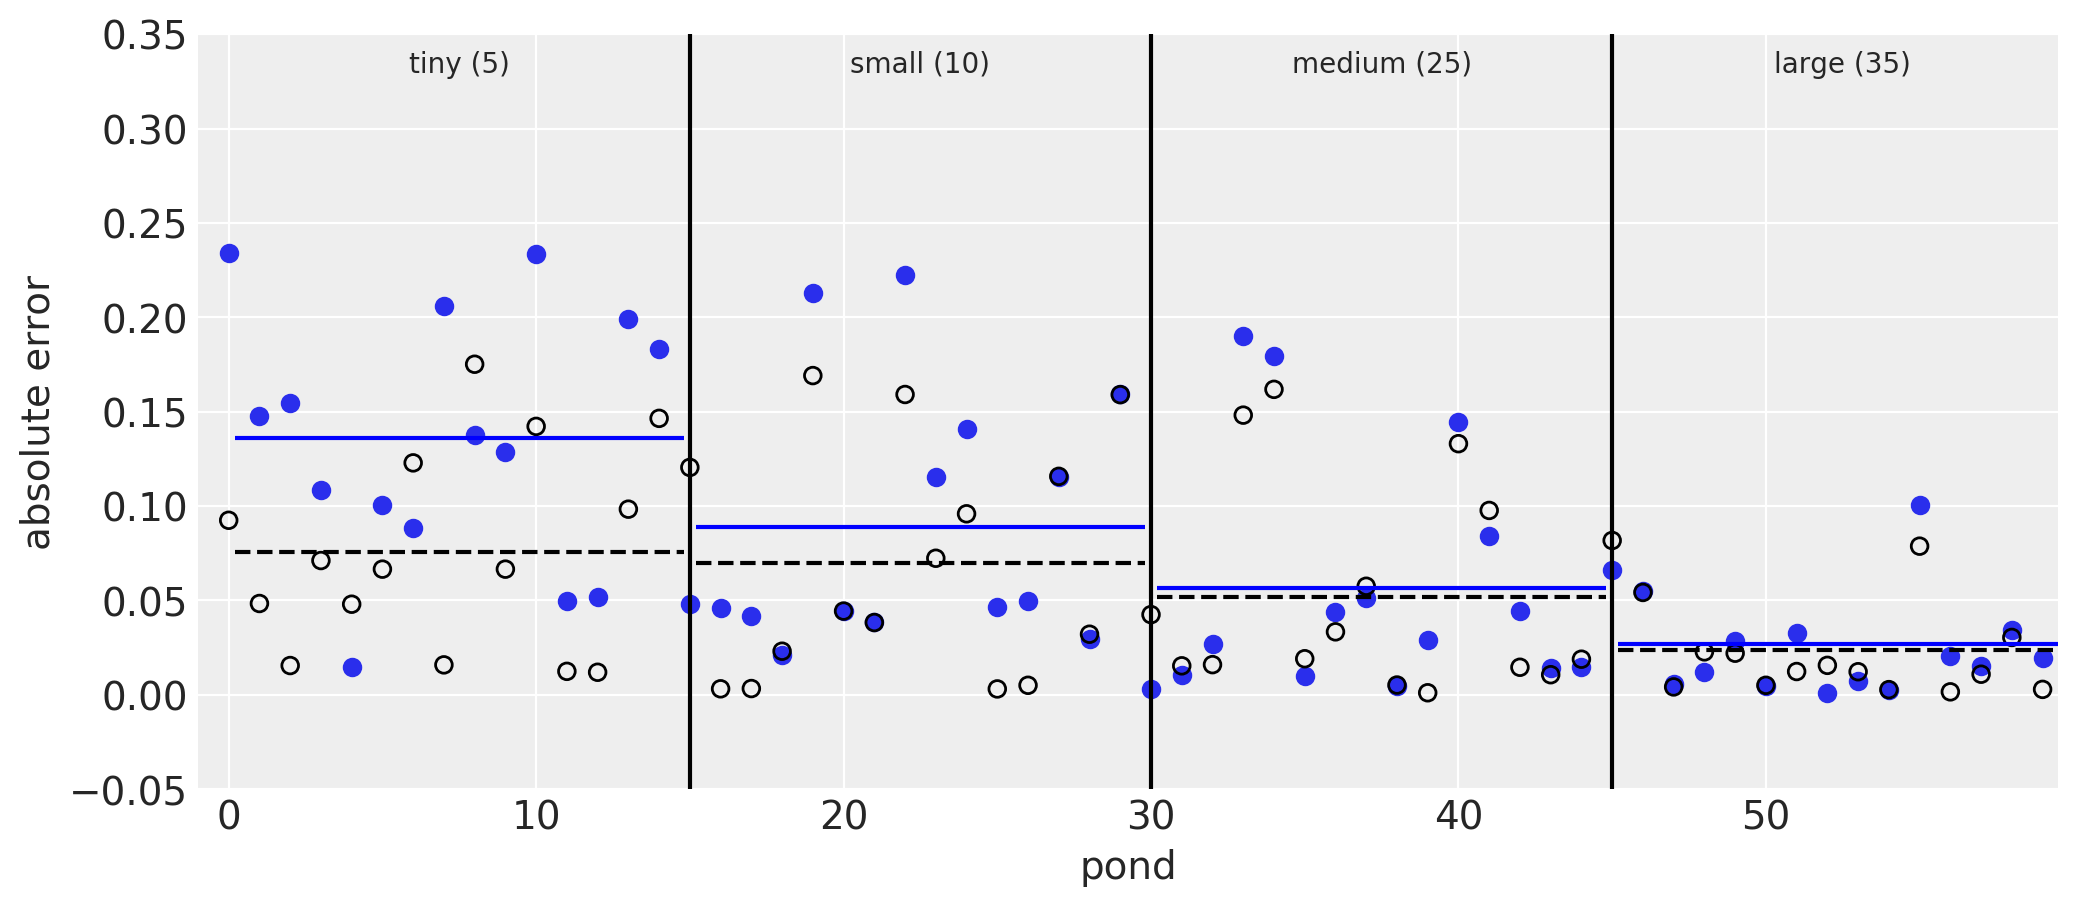

In [112]:
_, ax = plt.subplots(1,1, figsize=(12,5))

# plot no pooling errors
ax.scatter(dsim.pond, nopool_error)

# plot estimated probability
ax.scatter(dsim.pond, partpool_error, facecolors='none', edgecolors='k', lw=1)


# Plot the extra lines in the figure
for idx, (v, s) in enumerate(zip([5, 10, 25, 35], ["tiny", "small", "medium", "large"])):
    ax.text(7.5 + 15*idx, 0.33, f"{s} ({v})", horizontalalignment='center')
    ax.axvline(15*(idx+1), color='k')
    ax.hlines(np.mean(nopool_error[dsim.ni == v]), 15*idx + 0.2, 15*(idx+1) - 0.2, color="b")
    ax.hlines(np.mean(partpool_error[dsim.ni == v]), 15*idx + 0.2, 15*(idx+1) - 0.2, linestyle="--")


ax.set(xlim=(-1,59.5), ylim=(-0.05, 0.35))
ax.set_xlabel('pond', fontsize=14)
ax.set_ylabel('absolute error', fontsize=14);

##### Code 12.19

### More than one type of cluster

##### Code 12.20

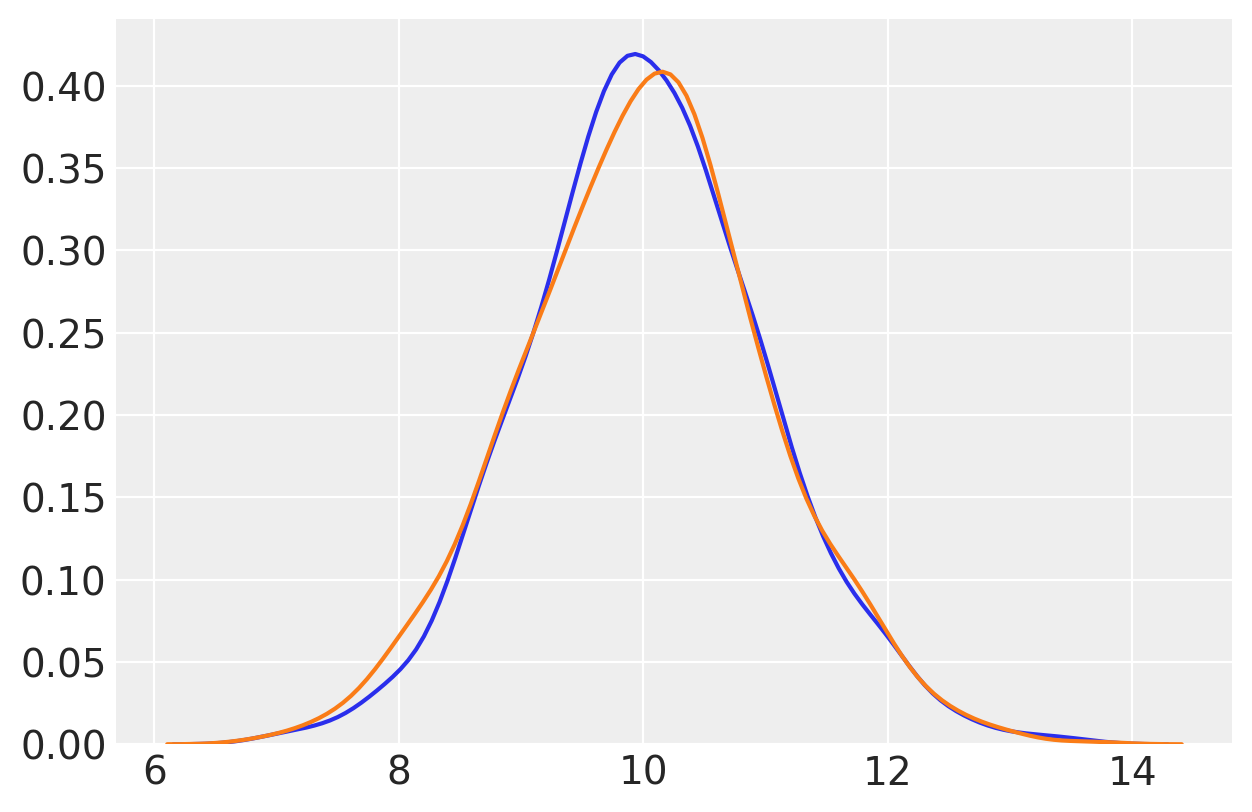

In [117]:
y1 = np.random.normal(10, 1, 1000)
y2 = 10 + np.random.normal(0, 1, 1000)

sns.kdeplot(y1)
sns.kdeplot(y2);

##### Code 12.21

In [235]:
d = pd.read_csv("../data/chimpanzees.csv", sep=";")
# we change "actor" to zero-index
d.actor = (d.actor - 1).astype(int)
Nactor = len(d.actor.unique())

with pm.Model() as m12_4:
    sigma_actor = pm.HalfCauchy('sigma_actor', 1)
    a_actor = pm.Normal('a_actor', 0, sigma_actor, shape=Nactor)
    a = pm.Normal('a', 0, 10)
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    p = pm.Deterministic('p', pm.math.invlogit(a + a_actor[d.actor] + (bp + bpC * d.condition) * d.prosoc_left))
    pulled_left = pm.Binomial('pulled_left', n=1, p=p, observed=d.pulled_left)
    trace_m12_4 = pm.sample(6000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bpC, bp, a, a_actor, sigma_actor]
Sampling 2 chains, 0 divergences: 100%|██████████| 14000/14000 [01:20<00:00, 174.20draws/s]
The number of effective samples is smaller than 25% for some parameters.


##### Code 12.22

In [123]:
total_a_actor = np.asarray([trace_m12_4["a"] + trace_m12_4["a_actor"][:,i] for i in range(Nactor)])
total_a_actor.mean(1).round(2)

array([-0.72,  4.46, -1.02, -1.02, -0.71,  0.23,  1.75])

##### Code 12.23

In [129]:
d.block = (d.block - 1).astype(int)
Nblock = len(d.block.unique())

with pm.Model() as m12_5:
    sigma_actor = pm.HalfCauchy('sigma_actor', 1)
    sigma_block = pm.HalfCauchy('sigma_block', 1)
    a_actor = pm.Normal('a_actor', 0, sigma_actor, shape=Nactor)
    a_block = pm.Normal('a_block', 0, sigma_block, shape=Nblock)
    a = pm.Normal('a', 0, 10)
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    p = pm.Deterministic('p', pm.math.invlogit(a + a_actor[d.actor] + a_block[d.block] + (bp + bpC * d.condition) * d.prosoc_left))
    pulled_left = pm.Binomial('pulled_left', n=1, p=p, observed=d.pulled_left)
    trace_m12_5 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bpC, bp, a, a_block, a_actor, sigma_block, sigma_actor]
Sampling 2 chains, 15 divergences: 100%|██████████| 4000/4000 [00:27<00:00, 144.12draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.709881409990072, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


##### Code 12.24

In [130]:
az.summary(trace_m12_5, var_names=["~p"], credible_interval=0.89, round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a_actor[0],-1.24,1.07,-2.85,0.29,0.13,0.12,70.44,37.96,68.42,128.49,1.04
a_actor[1],4.40,2.01,1.92,6.70,0.17,0.12,148.68,135.01,300.62,121.07,1.04
a_actor[2],-1.54,1.09,-3.11,-0.03,0.13,0.12,74.57,41.24,78.23,131.25,1.04
a_actor[3],-1.53,1.07,-3.19,-0.06,0.13,0.12,70.27,37.41,66.67,129.71,1.04
a_actor[4],-1.23,1.06,-2.50,0.58,0.10,0.09,104.92,76.18,90.44,119.65,1.04
a_actor[5],-0.28,1.06,-1.79,1.26,0.11,0.08,89.25,89.25,77.04,129.42,1.04
a_actor[6],1.24,1.08,-0.37,2.72,0.13,0.09,74.99,74.99,72.71,124.85,1.04
a_block[0],0.01,0.17,-0.25,0.27,0.01,0.01,1091.68,432.21,1275.00,944.30,1.00
a_block[1],-0.03,0.17,-0.30,0.22,0.00,0.01,1208.19,566.10,1343.23,684.54,1.02
a_block[2],0.11,0.19,-0.13,0.42,0.01,0.01,524.58,434.26,751.33,757.10,1.01


##### Figure 12.4a

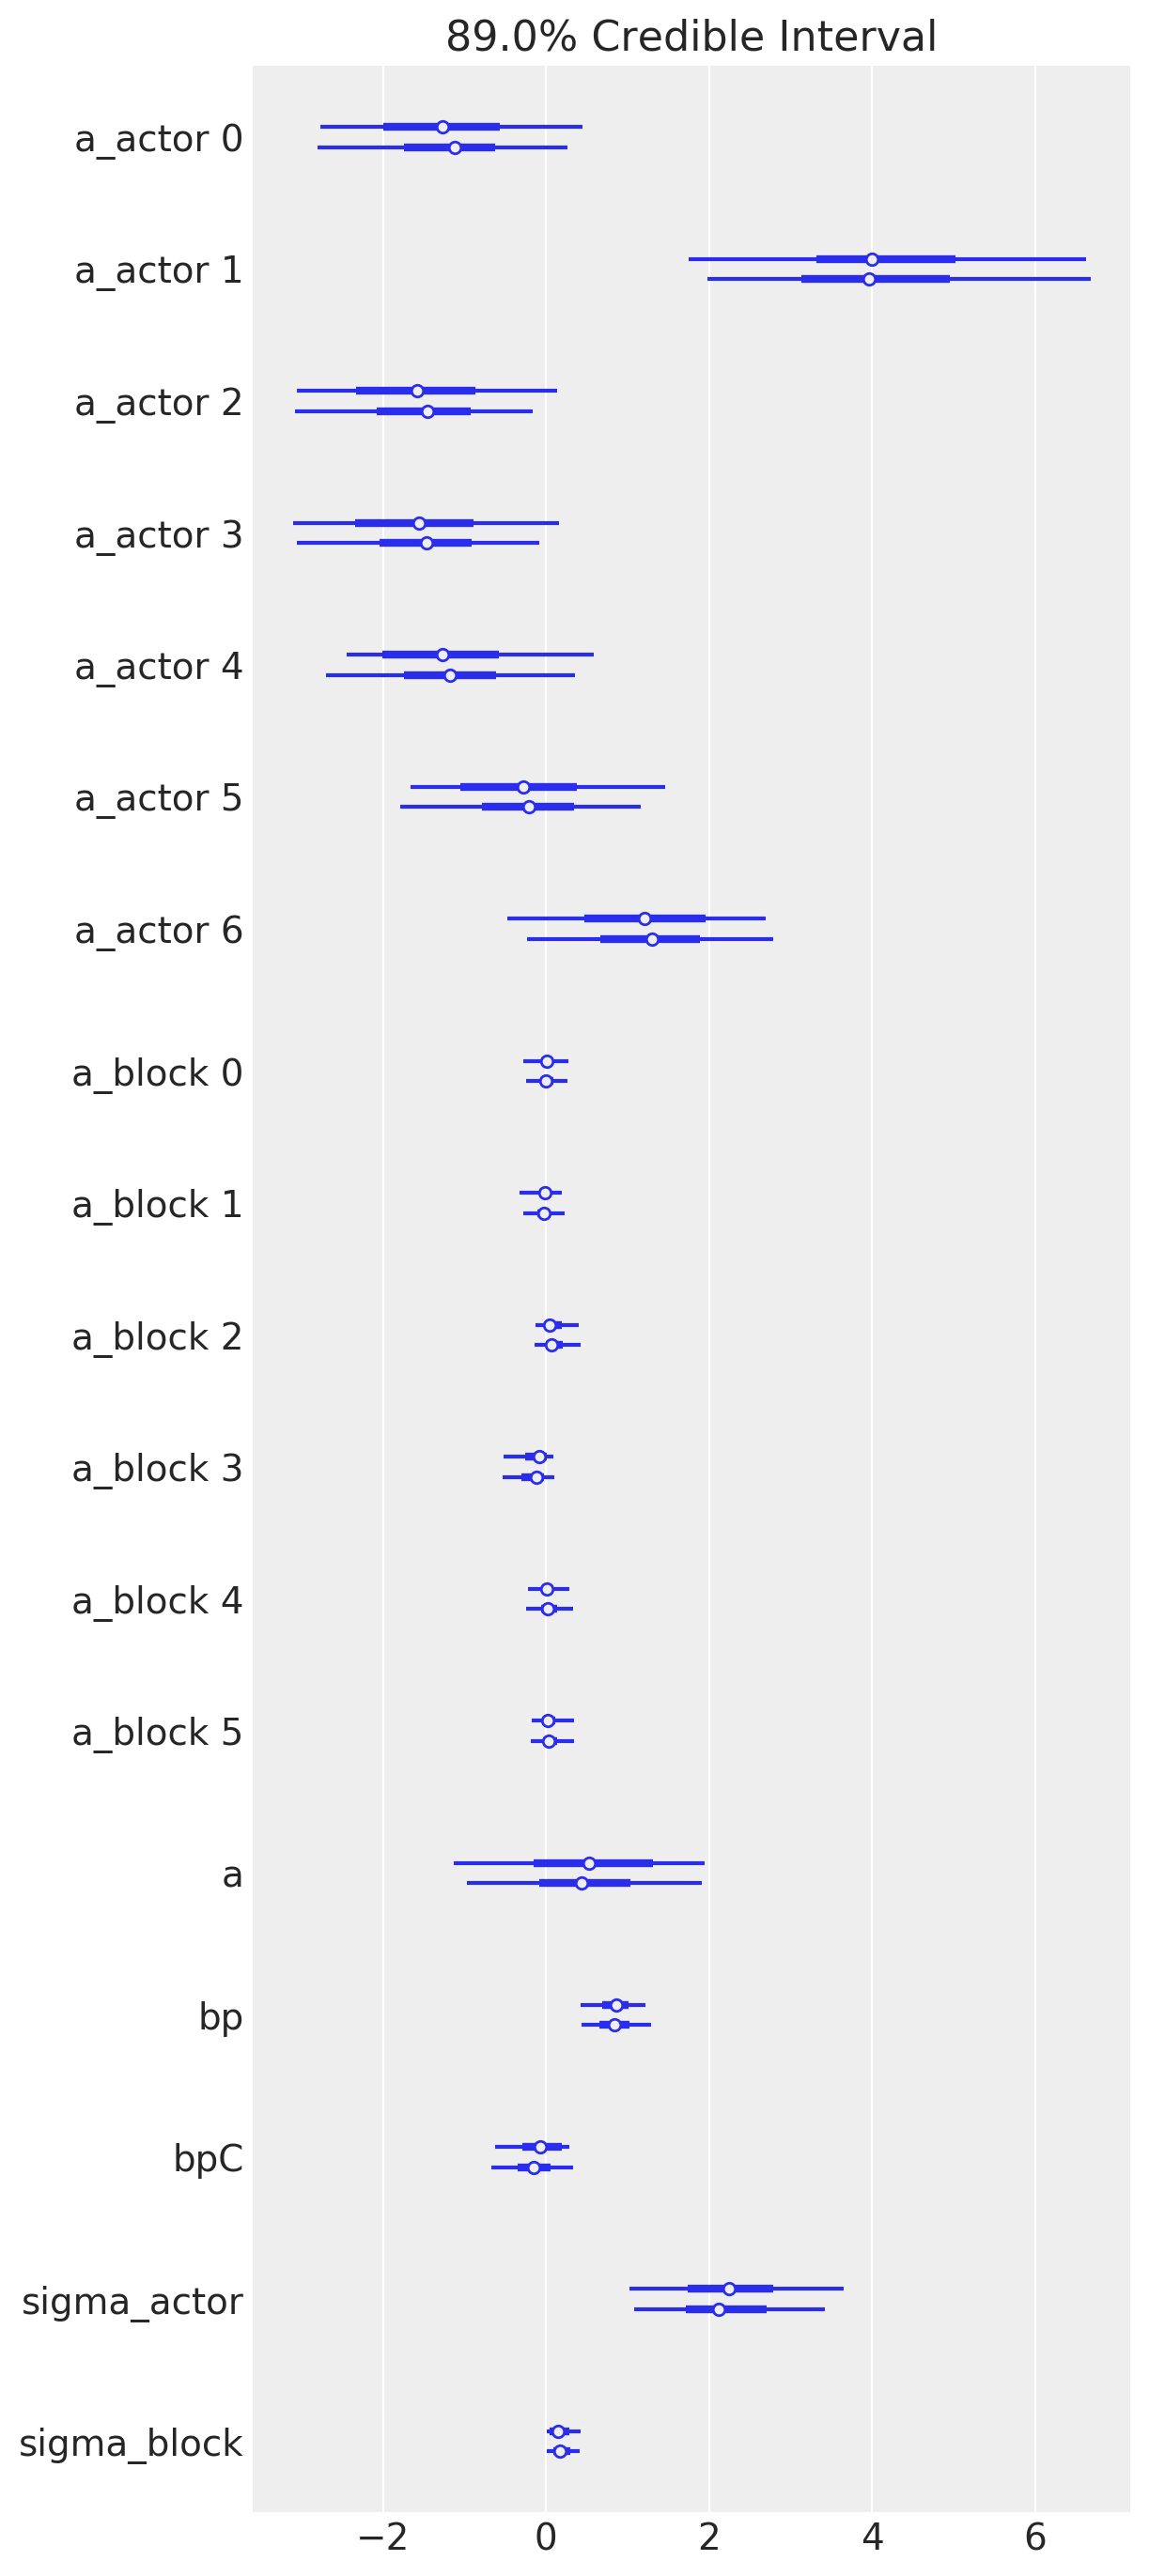

In [134]:
az.plot_forest(trace_m12_5, var_names=["~p"], credible_interval=0.89);

##### Code 12.25 & Figure 12.4b

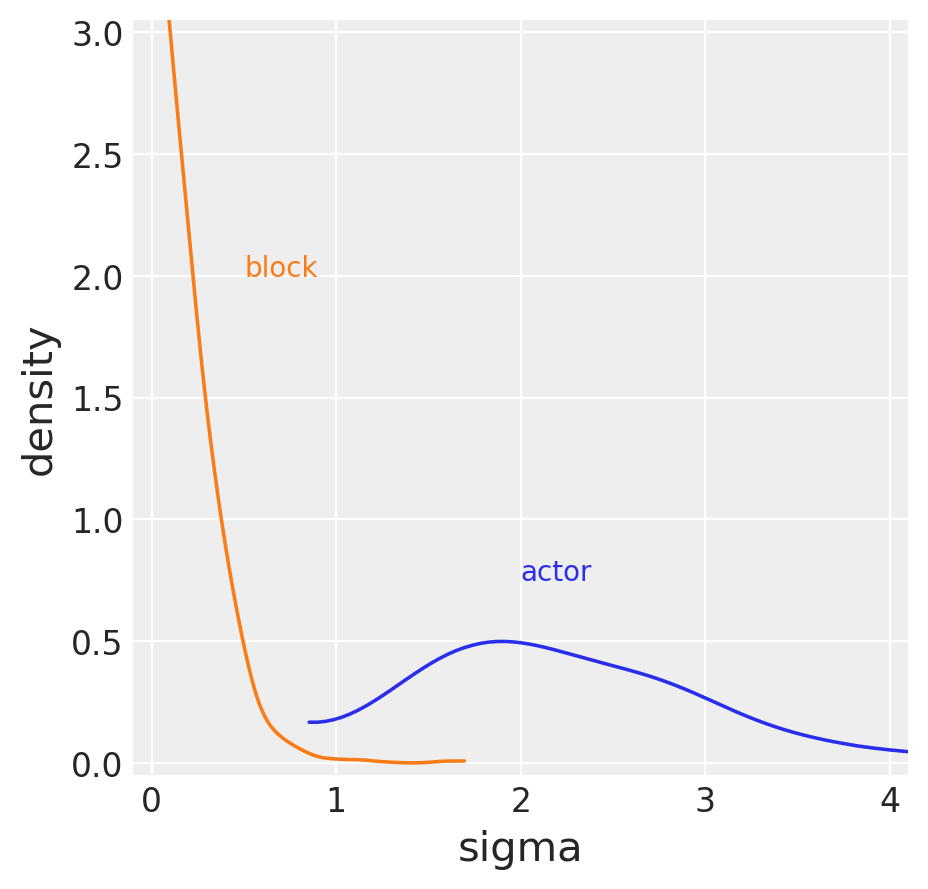

In [141]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))
az.plot_kde(trace_m12_5['sigma_actor'], ax=ax)
az.plot_kde(trace_m12_5['sigma_block'], ax=ax, plot_kwargs={'color':'C1'})
ax.text(2, 0.75, "actor", color='C0')
ax.text(0.5, 2, "block", color='C1')
ax.set_xlabel('sigma')
ax.set_ylabel('density')
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.05, 3.05);

##### Code 12.26

In [143]:
compare_df = az.compare({f"m12_{i}": eval(f"trace_m12_{i}") for i in [4,5]})
compare_df

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m12_4,0,531.323,8.12058,0,0.653351,20.1776,0,False,deviance
m12_5,1,532.754,10.4708,1.43042,0.346649,20.3261,1.73986,False,deviance


### Multilevel posterior predictions

##### Code 12.27

/Users/hamzaiqb/.pyenv/versions/miniconda3-4.3.30/envs/statrethinking/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [00:00<00:00, 1069.21it/s]


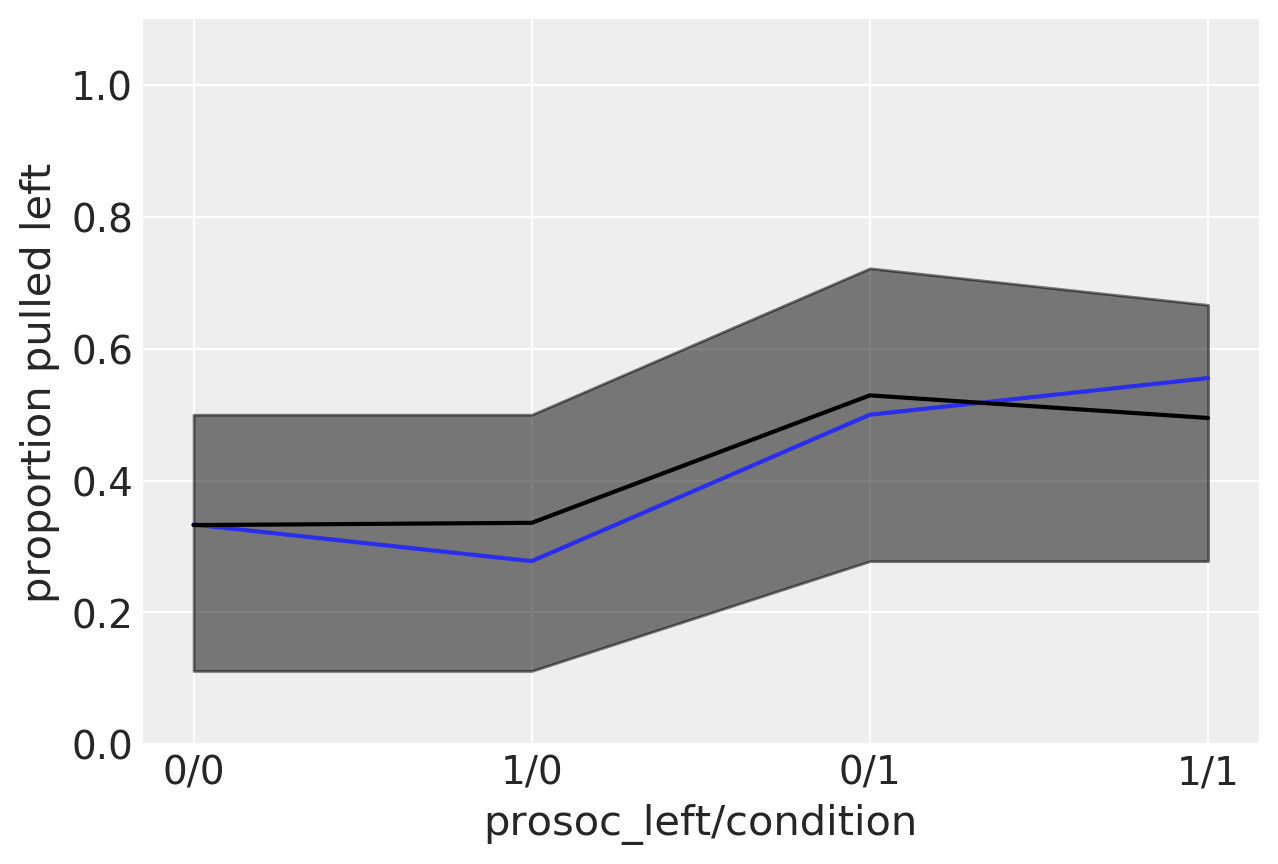

In [178]:
chimp = 0

ppc = pm.sample_posterior_predictive(trace=trace_m12_4, samples=1000, model=m12_4)
grouping_cols = ["actor", "prosoc_left", "condition"]
df = (
    pd.concat([d[grouping_cols], pd.DataFrame(ppc["pulled_left"].T)], axis=1)
    .query("actor == @chimp")
    .groupby(grouping_cols)
    .mean()
    .reset_index(drop=True)
    .T
)

ticks = range(4)
chimps = (
    d
    .query("actor == @chimp")
    .groupby(['prosoc_left', 'condition'])
    .pulled_left.mean()
    .reset_index()
)
# Plot individual line for each chimp
chimps.pulled_left.plot(style="C0", legend=False)
# Plot shaded area of posterior predictive
az.plot_hpd(ticks, df, color='k', smooth=False, credible_interval=0.89)
df.mean().plot(color='k')
plt.ylim(0, 1.1)
plt.xlabel("prosoc_left/condition")
plt.ylabel("proportion pulled left")
plt.xticks(range(4), ("0/0","1/0","0/1","1/1"));

##### Code 12.28

In [182]:
post = pm.trace_to_dataframe(trace_m12_4, varnames=[v for v in trace_m12_4.varnames if not v.startswith("p")])
post.head()

,sigma_actor_log__,a_actor__0,a_actor__1,a_actor__2,a_actor__3,a_actor__4,a_actor__5,a_actor__6,a,bp,bpC,sigma_actor
0,0.785867,-2.663385,3.431630,-3.253439,-3.127969,-3.015084,-2.058528,-0.614874,2.107986,0.692975,-0.196399,2.194308
1,1.484145,-3.665330,1.838093,-3.985300,-3.637487,-3.207036,-2.233503,-0.682667,2.399602,1.031061,-0.075548,4.411191
2,1.439975,-3.492170,1.987241,-3.775877,-3.512357,-3.129284,-2.273782,-0.745352,2.439459,1.035753,-0.093466,4.220590
3,0.963016,-2.781922,3.541262,-3.064897,-2.934279,-2.489054,-1.725364,0.333392,2.012025,0.758557,-0.369955,2.619585
4,0.498836,-0.859766,3.364738,-1.227164,-0.856387,-1.210356,0.214362,1.048937,0.218308,0.760606,-0.114938,1.646803


##### Code 12.29

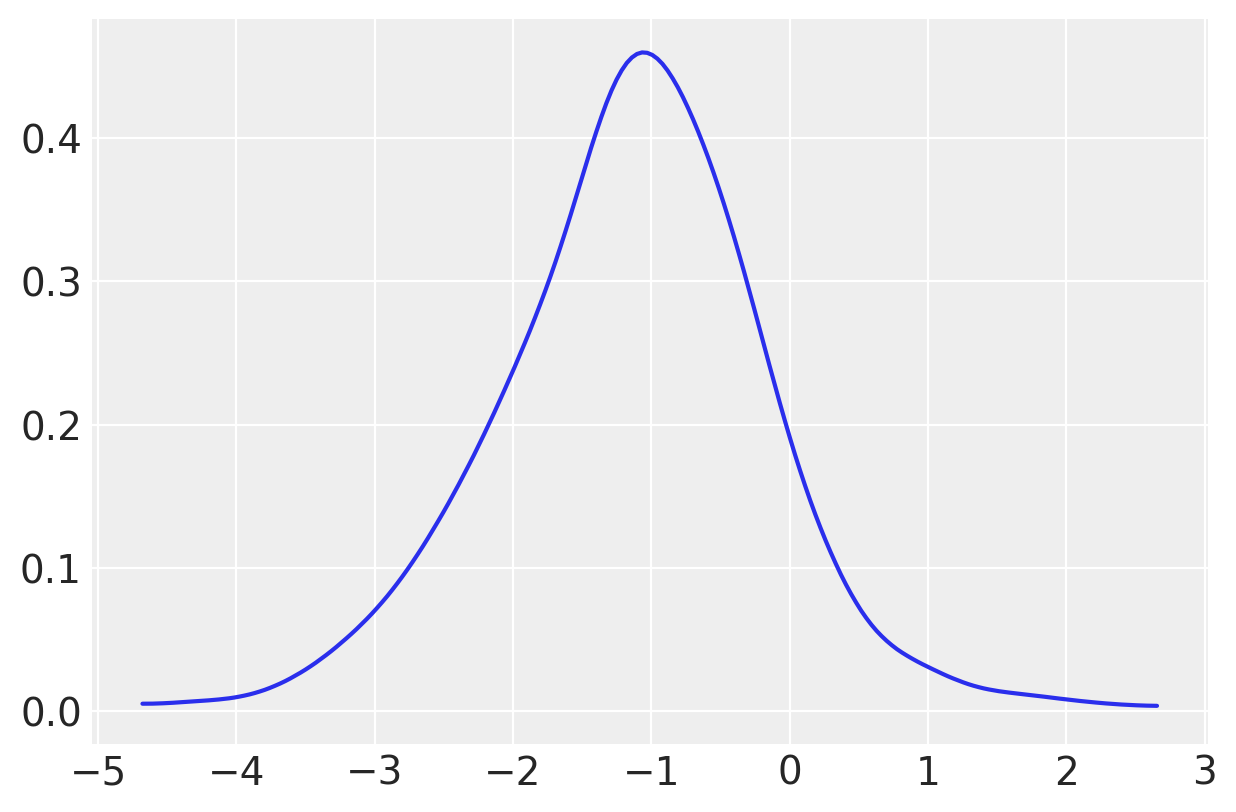

In [186]:
az.plot_kde(trace_m12_4["a_actor"][:, 4]);

##### Code 12.30

In [187]:
def p_link(prosoc_left, condition, actor, trace):
    logodds = trace["a"] + trace["a_actor"][:, actor] + (trace["bp"] + trace["bpC"] * condition) * prosoc_left
    return logistic(logodds)

##### Code 12.31

In [189]:
prosoc_left = [0,1,0,1]
condition = [0,0,1,1]

pred_raw = np.asarray([p_link(p, c, 1, trace_m12_4) for p, c in zip(prosoc_left, condition)])
pred_p = np.mean(pred_raw, axis=0)
pred_p_pi = az.hpd(pred_raw, credible_interval=0.89)

##### Code 12.32

In [190]:
d_pred = pd.DataFrame(dict(prosoc_left=[0, 1, 0, 1],
                           condition=[0, 0, 1, 1],
                           actor=np.repeat(2, 4)))

##### Code 12.33

In [191]:
# replace varying intercept samples with zeros
# 1000 samples by 7 actors
a_actor_zeros = np.zeros((1000, 7))

##### Code 12.34 & Figure 12.5a

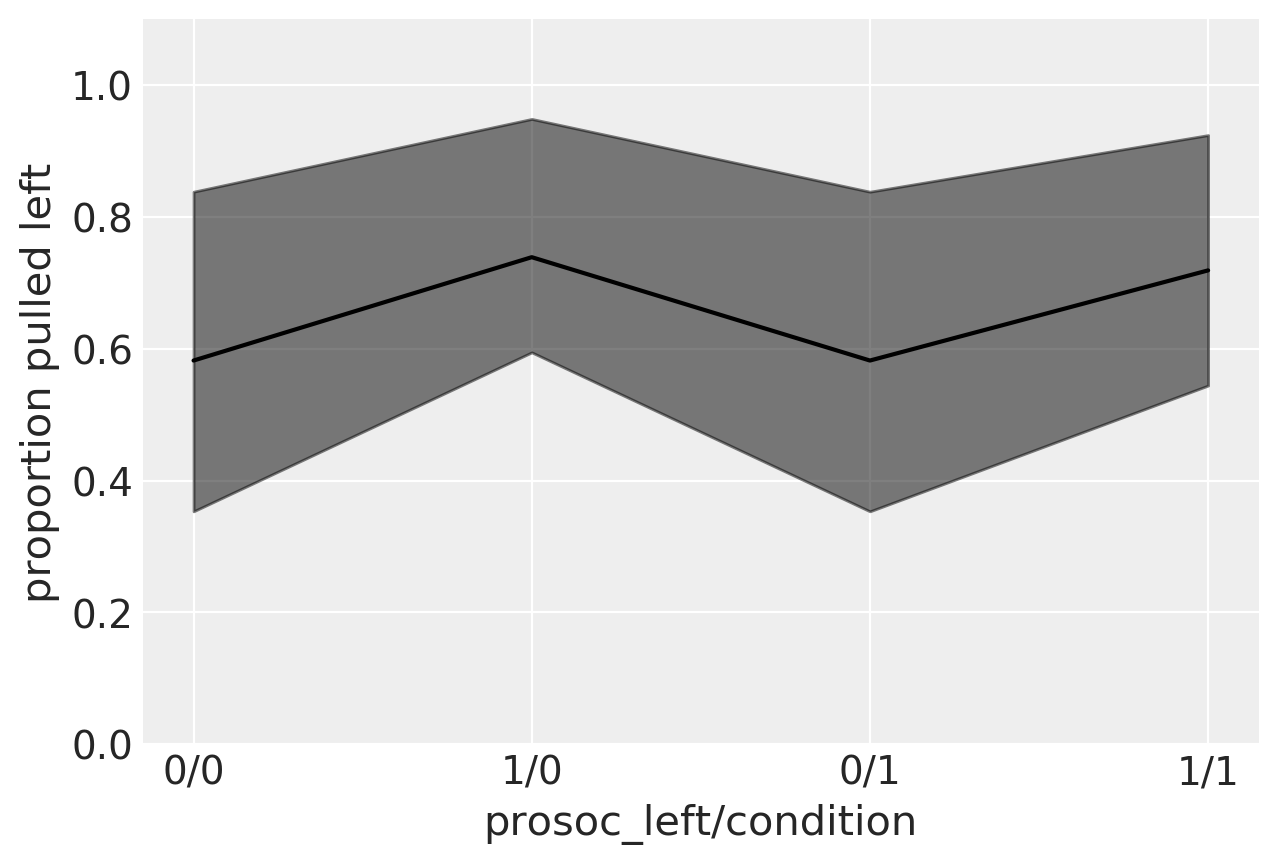

In [236]:
def p_link(prosoc_left, condition, actor_sim, trace):
    Nsim = actor_sim.shape[0]//trace.nchains
    trace = trace[:Nsim]
    logodds = trace['a'] + np.mean(actor_sim, axis=1) + (trace['bp'] + trace['bpC'] * condition) * prosoc_left
    return logistic(logodds)

pred_raw = np.asarray([p_link(p, c, a_actor_zeros, trace_m12_4) for p, c in zip(prosoc_left, condition)])

az.plot_hpd(range(4), pred_raw.T, credible_interval=.80, color='k', smooth=False)
plt.plot(range(4), np.mean(pred_raw, axis=1), color='k')

plt.ylim(0, 1.1)
plt.xlabel("prosoc_left/condition")
plt.ylabel("proportion pulled left")
plt.xticks(range(4), ("0/0","1/0","0/1","1/1"));

##### Code 12.35

In [239]:
# replace varying intercept samples with simulations
sigma_actor = trace_m12_4.get_values('sigma_actor')
a_actor_sims = np.random.normal(loc=0, scale=np.reshape(sigma_actor[:7000], (1000, 7)))

##### Code 12.36

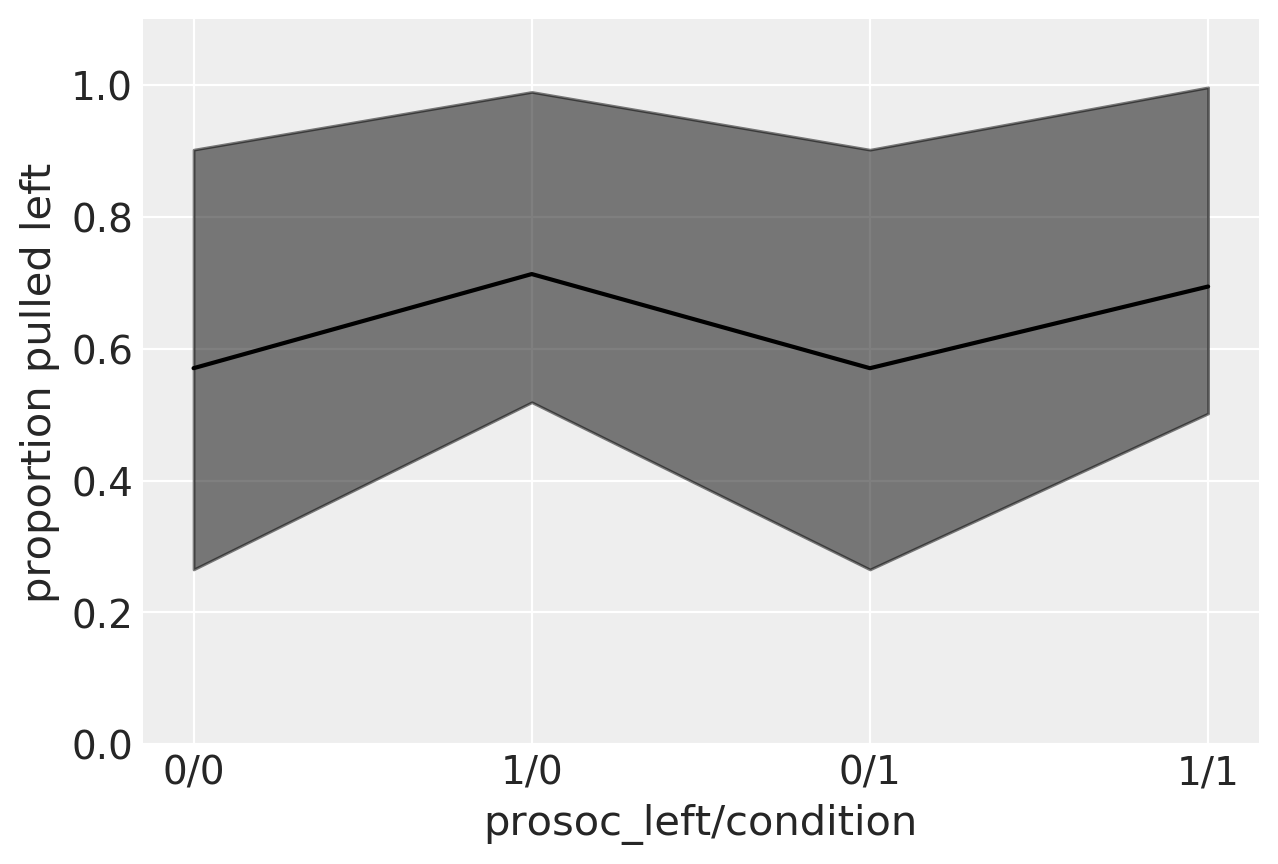

In [240]:
pred_raw = np.asarray([p_link(p, c, a_actor_sims, trace_m12_4) for p, c in zip(prosoc_left, condition)])

az.plot_hpd(range(4), pred_raw.T, credible_interval=.80, color='k', smooth=False)
plt.plot(range(4), np.mean(pred_raw, axis=1), color='k')

plt.ylim(0, 1.1)
plt.xlabel("prosoc_left/condition")
plt.ylabel("proportion pulled left")
plt.xticks(range(4), ("0/0","1/0","0/1","1/1"));

##### Code 12.37

In [241]:
def sim_actor(tr, i):
    sim_a_actor = np.random.randn()*tr['sigma_actor'][i]
    P = np.array([0, 1, 0, 1])
    C = np.array([0, 0, 1, 1])
    p = logistic(tr['a'][i] + sim_a_actor + (tr['bp'][i] + tr['bpC'][i]*C)*P)
    return p

##### Code 12.38

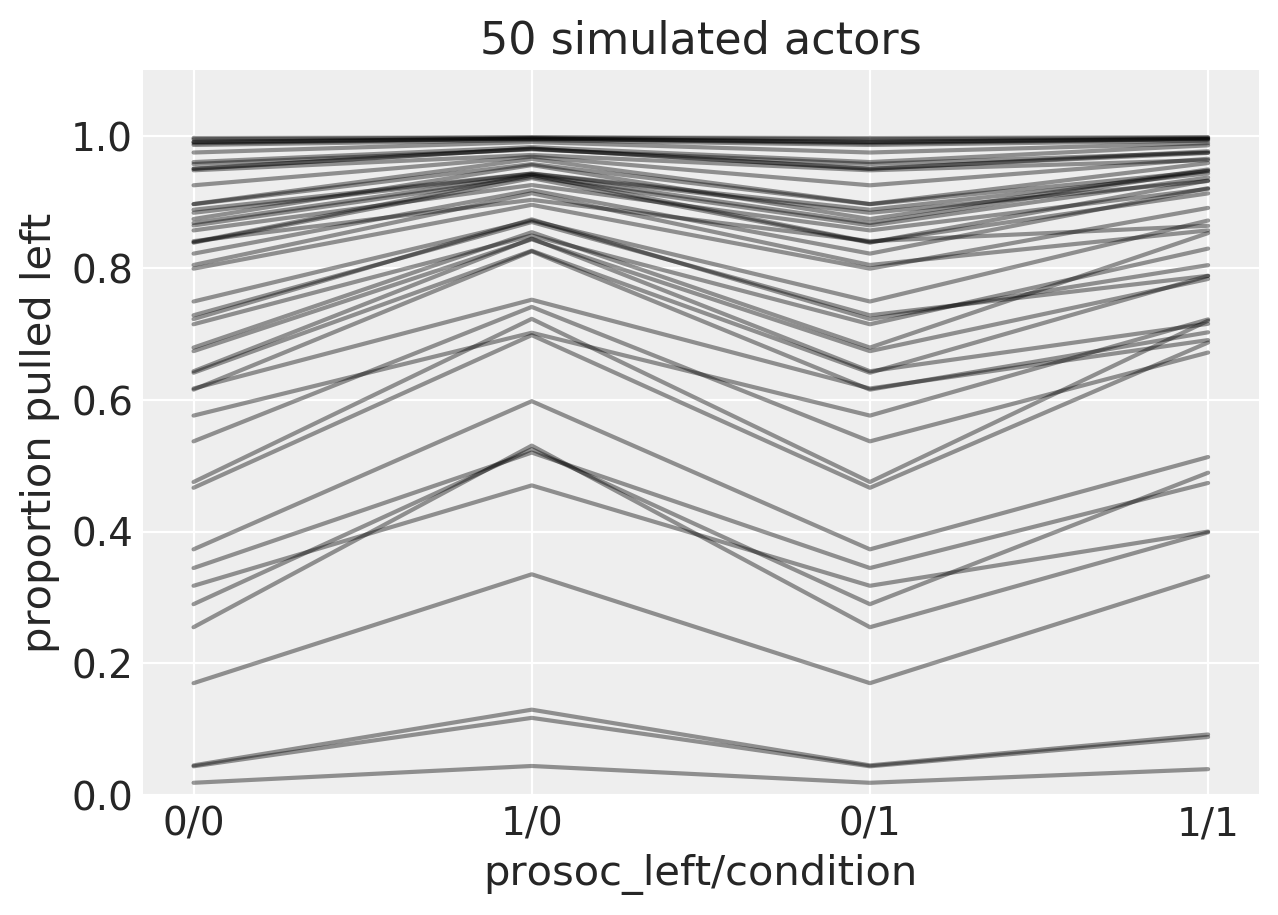

In [244]:
for i in range(50):
    plt.plot(range(4), sim_actor(trace_m12_4, i), color='k', alpha=0.4)

plt.ylim(0, 1.1)
plt.xlabel("prosoc_left/condition")
plt.ylabel("proportion pulled left")
plt.title("50 simulated actors")
plt.xticks(range(4), ("0/0","1/0","0/1","1/1"));

##### Code 12.39

In [245]:
d = pd.read_csv("../data/Kline.csv", sep=";")
d["logpop"] = np.log(d.population)
d.society = d.index

with pm.Model() as m12_6:
    sigma_society = pm.HalfCauchy("sigma_society", 1)
    a_society = pm.Normal("a_society", 0, sigma_society, shape=d.society.nunique())
    a = pm.Normal("a", 0, 10)
    bp = pm.Normal("bp", 0, 1)
    mu = pm.Deterministic("mu", pm.math.exp(a + a_society[d.society] + bp * d.logpop))
    total_tools = pm.Poisson("total_tools", mu=mu, observed=d.total_tools)
    trace_m12_6 = pm.sample(5000, tune=1000)

/Users/hamzaiqb/.pyenv/versions/miniconda3-4.3.30/envs/statrethinking/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bp, a, a_society, sigma_society]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:54<00:00, 218.62draws/s]
The number of effective samples is smaller than 25% for some parameters.


##### Code 12.40

In [247]:
sigma_society = trace_m12_6.get_values('sigma_society', combine=True)[:, None]
a_society_sims = np.random.normal(loc=0, scale=sigma_society)
log_pop_seq = np.linspace(6, 14, 30)
a_post = trace_m12_6.get_values(varname='a', combine=True)[:, None]
bp_post = trace_m12_6.get_values(varname='bp', combine=True)[:, None]
link_m12_6 = np.exp(a_post + a_society_sims + bp_post*log_pop_seq)

##### Code 12.41 & Figure 12.6

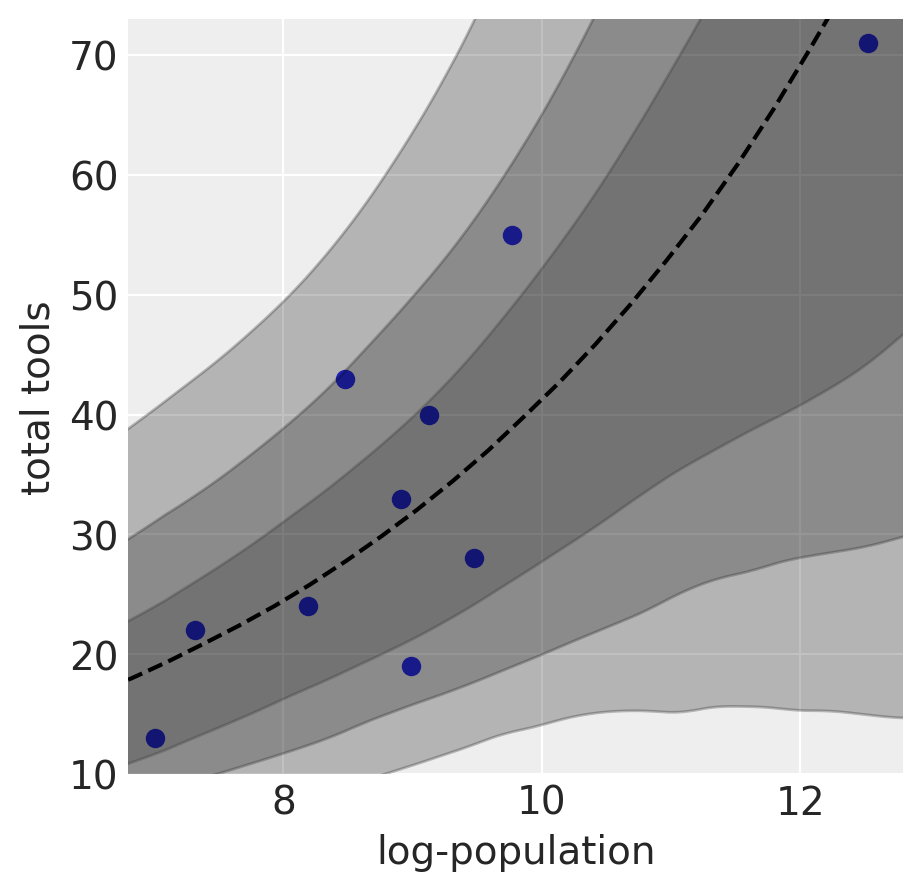

In [251]:
# plot raw data
_, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(d.logpop, d.total_tools)

axes.plot(log_pop_seq, np.median(link_m12_6, axis=0), '--', color='k')

for alpha in [.67, .89, .97]: 
    mu_hpd = pm.hpd(link_m12_6, credible_interval=alpha)
    az.plot_hpd(log_pop_seq, link_m12_6, credible_interval=alpha, color='k',
                fill_kwargs={'alpha':alpha*.25})

axes.set_xlabel('log-population', fontsize=14)
axes.set_ylabel('total tools', fontsize=14)
axes.set_xlim(6.8, 12.8)
axes.set_ylim(10, 73);

In [ ]:
import sys, IPython, scipy, matplotlib, platform, statsmodels, arviz
print("""
This notebook was created using:\nPython {}\nIPython {}\nPyMC3 {}\nSeaborn {}\nNumPy {}\nPandas {}\nStatsmodels {}\nMatplotlib {}\nScipy {}\nArviz {}\n
""".format(sys.version[:5], IPython.__version__, pm.__version__, sns.__version__, np.__version__, pd.__version__, statsmodels.__version__, matplotlib.__version__, scipy.__version__, arviz.__version__))
